# PA005: High Value Customer Identification

## <font color='red'> Ciclo 00 - Planejamento - Método IOT </font>

## <font color='red'> Ciclo 01 - Métricas de Validação de Clusters </font>

1. Feature Engineering
    - Recência
    - Frequência
    - Monetização
    
    
2. Métricas de validação de Clustering
    - WSS ( Within-Cluster Sum of Square )  
    - SS ( Silhouette Score )
    
    
3. Cluster Analysis
    - Plot 3D
    - Cluster Profile

## <font color='red'> Ciclo 02 - Análise de Silhouette </font>

1. Análise Descritiva
    - Atributos numéricos
    - Atributos categóricos
    
    
2. Feature Engineering
    - Average Ticket
    
    
3. Análise de Silhouette
    - Silhouette Analysis  
    
    
4. Cluster Visualization
    - t-SNE
    
    
5. Cluster Análise de Perfil
    - Descrição dos centróides dos cluster

## <font color='red'> Ciclo 03 - </font>

1. Análise Descritiva
    - Atributos numéricos
    - Atributos categóricos
    
    
2. Feature Engineering
    - Average Ticket
    - Average Recency
    
    
2. Data preparation
    - Standard Scaler
    - MinMax Scaler
    
    
3. Métricas de validação de Clustering
    - DB Index
    - Dunn Index
    - GS ( Gap Statistic) 
    - DB Index ( Davies Bouldin Index )
    - CH Index
    - Gap Statistic
    
    
4. Análise de Silhouette
    - Silhouette Analysis  
    
    
5. Cluster Visualization
    - t-SNE

# Planejamento da Solução ( IOT )

## Input - Entrada

### O problema de negócio

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

## Output - Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Processo

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - Alto Ticket Médio
            - Alto LTV
            - Baixa Recência ou Alta Frequência ( tempo entre as compras )
            - Alto Basket Size ( quantidade média de produtos comprados )
            - Baixa probabilidade de Churn
            - Previsão alta de LTV
            - Alta propensão de compra

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

# 0.0. Imports

In [185]:
import numpy   as np
import pandas  as pd
import seaborn as sns

from plotly  import express       as px
from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import preprocessing as pp

from IPython.core.display import HTML

## 0.2. Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.3. Load dataset

In [5]:
df_raw = pd.read_csv( '../data/raw/Ecommerce.csv', encoding='unicode_escape' )

# <font color='red'> 1.0. Descrição dos dados </font>

In [6]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [7]:
new_cols = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country', 'unnamed']
df1.columns = new_cols

df1 = df1.drop( 'unnamed', axis=1 )

## 1.2. Data dimensions

In [8]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Columns: {}'.format( df1.shape[1] ) )

Number of Rows: 541909
Number of Columns: 8


## 1.3. Data types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [11]:
# remove na
df1 = df1.dropna( subset=['description', 'customer_id'] )

print( 'Removed data: {:.2f}%'.format( 1-( df1.shape[0]/df_raw.shape[0] ) ) )

Removed data: 0.25%


## 1.6. Change Dtypes

In [12]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [13]:
# invoice date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer id
df1['customer_id'] = df1['customer_id'].astype( int )

In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

In [15]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Numerical Attributes

In [26]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - desvio padrão, mínimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d2, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,-80995.0,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,0.0,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,12346.0,0.029835,-1.179982


#### Investigar

1. Valor da quantidade negativo

2. Quantidade máxima de ~81k, sendo a média de 12 quantidades.

3. Produto com preço unitário igual a R$ 0.00

4. Valor unitário do produto máximo de R$39k, sendo a média igual a R$3.5

5. Desvio padrão do valor unitário é R$ 0.00

### 1.7.2. Categorical Attributes

#### Invoice No

In [63]:
## invoice_no - 3654 unique invoices out of 8905 start with 'C'
#
#cat_attributes['invoice_no'].astype( int )
#cat_attributes['invoice_no'].sample(40).apply( lambda x: bool( re.search( '[^0-9]+', x ) ) )
#cat_attributes.loc[ 55930, 'invoice_no']

# only invoice with some letter
cat_aux_01 = cat_attributes.loc[cat_attributes['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), 'invoice_no'].drop_duplicates()
print( len( cat_aux_01.tolist() ) )

# only invoice starting with C
np.sum( [ 0 if re.search( 'C\d+', i ) else 1  for i in cat_aux_01.tolist()] )

3654


0

#### Stock Code

In [ ]:
#cat_attributes.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), 'stock_code'].unique()

#### Description

In [73]:
len( cat_attributes['description'].unique() )

3896

# <font color='red'> 2.0. Feature Engineering </font>

In [143]:
df2 = df1.copy()

## 2.1. Create new features

In [144]:
# data reference
df_ref = df2.drop( ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1 ).drop_duplicates( ignore_index=True )

# Gross Revenue ( Faturamento )
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Recency
df_recency = df2[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, how='left', on='customer_id' )

# Frequency
df_frequency = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_frequency, how='left', on='customer_id' )

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, how='left', on='customer_id' )

# Average Ticket
df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue': 'avg_ticket'} )
df_avg_ticket['avg_ticket'] = np.round( df_avg_ticket['avg_ticket'], 2 )
df_ref = pd.merge( df_ref, df_avg_ticket, how='left', on='customer_id' )

# Average Recency Days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False] ).copy()
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['next_date'] = df_aux['invoice_date'].shift() # next invoice date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: (x['next_date'] - x['invoice_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )
df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'next_date'], axis=1 ).dropna()

df_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index().astype( int )
df_ref = pd.merge( df_ref, df_recency_days, how='left', on='customer_id' )

# <font color='red'> 3.0. Filtragem de Variáveis </font>

In [147]:
df3 = df_ref.dropna()

# <font color='red'> 4.0. EDA ( Análise Exploratória de Dados ) </font>

In [154]:
df4 = df3.copy()

# <font color='red'> 5.0. Data Preparation </font>

In [169]:
df5 = df4.copy()

In [170]:
# standardization
ss = pp.StandardScaler()

df5['recency_days'] = ss.fit_transform( df5[['recency_days']] )
df5['invoice_no'] = ss.fit_transform( df5[['invoice_no']] )
df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']] )
df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']] )
df5['avg_recency_days'] = ss.fit_transform( df5[['avg_recency_days']] )

# <font color='red'> 6.0. Feature Selection </font>

In [176]:
df6 = df5.copy()

# <font color='red'> 7.0. Hyperparamter fine-tunning </font>

In [360]:
X = df6.drop( columns=['customer_id'] ).copy()
X.head()

,recency_days,invoice_no,gross_revenue,avg_ticket,avg_recency_days
0,3.192495,2.600372,0.271360,-0.174441,-0.498282
1,-0.408491,1.025524,0.046960,-0.193616,-0.639483
2,-0.793837,1.025524,0.464193,0.006182,-0.717928
3,0.441926,-0.178772,-0.169450,0.087215,0.395991
4,3.564553,-0.086134,-0.201253,1.200334,-0.921885


In [361]:
clusters = [2, 3, 4, 5, 6]

kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

### 7.1. Within-Cluster Sum of Square

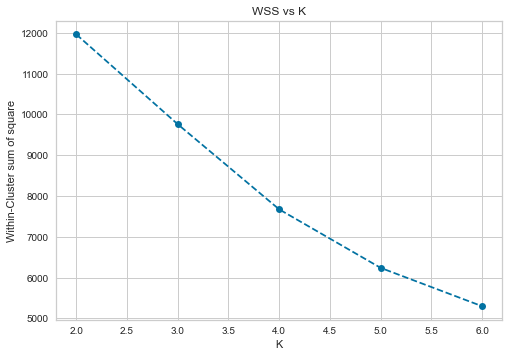

In [362]:
# Raíz
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

    # model training
    kmeans.fit( X )

    # validation
    wss.append( kmeans.inertia_ )

# Plot Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' )
plt.ylabel( 'Within-Cluster sum of square' );
plt.title( 'WSS vs K' );

/Users/meigarom.lopes/.pyenv/versions/3.8.0/envs/pa005insidersclustering/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/Users/meigarom.lopes/.pyenv/versions/3.8.0/envs/pa005insidersclustering/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



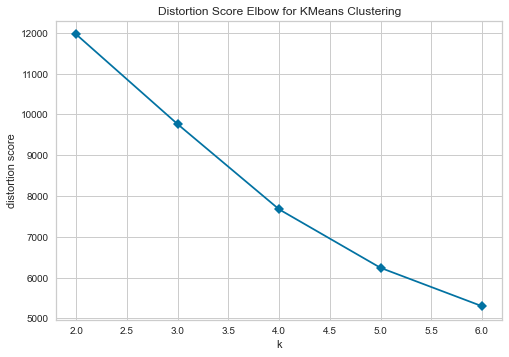

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [363]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( kmeans, k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

### 7.2. Silhouette Score

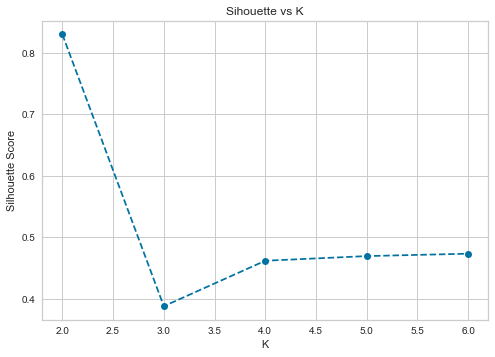

In [364]:
# Raíz
ss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

    # model training
    kmeans.fit( X )

    # clustering
    labels = kmeans.labels_
    
    # validation
    ss.append( m.silhouette_score( X, labels ) )

# Plot Elbow Method
plt.plot( clusters, ss, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' )
plt.ylabel( 'Silhouette Score' );
plt.title( 'Sihouette vs K' );

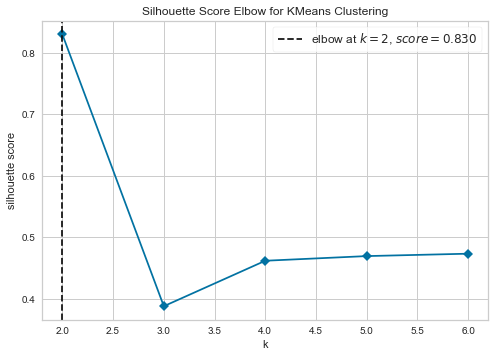

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [365]:
kmeans = KElbowVisualizer( kmeans, k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

# <font color='red'> 8.0. Model Training </font>

## 8.1. K-Means

In [366]:
# model definition
k = 2
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

### 8.1.1. Clustering Validation

In [367]:
# model performance 
## WSS ( Within-cluster Sum of Square )
print( 'WSS value: {}'.format( kmeans.inertia_ ) )

# Average Silhouette -> Best value is 1, Worst value is -1, Overlap Clustering is 0
average_silhouette = m.silhouette_score( X, labels, metric='euclidean' )
print( 'AS value: {}'.format( average_silhouette ) )

WSS value: 11962.947567950116
AS value: 0.8298589909669901


# <font color='red'> 9.0. Cluster Analysis </font>

In [368]:
df9 = df6.copy()
df9['cluster'] = labels

## 9.1. Visual Inspection

### 9.1.1. 3d Plot

<AxesSubplot:xlabel='recency_days', ylabel='gross_revenue'>

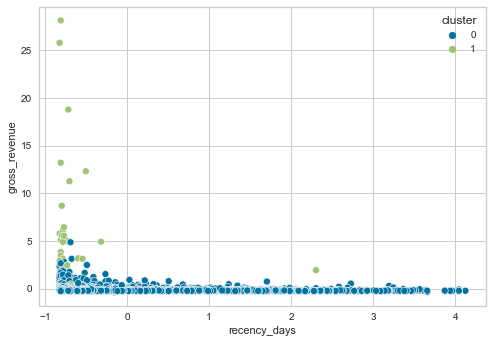

In [369]:
df9.head()
sns.scatterplot( x='recency_days', y='gross_revenue', hue='cluster', data=df9 )

### 9.1.2. t-SNE

In [370]:
from sklearn.manifold import TSNE

In [371]:
x = df9.drop( columns=['customer_id', 'cluster'], axis=1 )

tsne = TSNE( n_components=2, verbose=1, perplexity=400, n_iter=300 )
tsne_results = tsne.fit_transform( x )

[t-SNE] Computing 1201 nearest neighbors...
[t-SNE] Indexed 2991 samples in 0.002s...
[t-SNE] Computed neighbors for 2991 samples in 0.687s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2991
[t-SNE] Computed conditional probabilities for sample 2000 / 2991
[t-SNE] Computed conditional probabilities for sample 2991 / 2991
[t-SNE] Mean sigma: 0.406096
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.774433
[t-SNE] KL divergence after 300 iterations: 0.372701


In [372]:
x['tsne-2d-one'] = tsne_results[:,0]
x['tsne-2d-two'] = tsne_results[:,1]
x['cluster'] = df9['cluster']

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

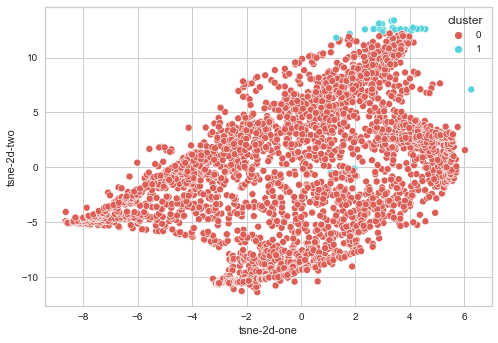

In [373]:
sns.scatterplot( x='tsne-2d-one', 
                 y='tsne-2d-two', 
                 hue='cluster', 
                 palette=sns.color_palette('hls', n_colors=len( x['cluster'].unique() ) ), 
                 data=x )

## 9.2. Cluster Profile

In [96]:
# Number of customer
df_cluster = df9[['cluster', 'customer_id']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Avg Recency
df_avg_recency = df9[['cluster', 'recency_days']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency, how='inner', on='cluster' )

# Avg Invoice Number
df_avg_invoice = df9[['cluster', 'invoice_no']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice, how='inner', on='cluster' )

# Avg Gross Revenue
df_avg_gross_revenue = df9[['cluster', 'gross_revenue']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

df_cluster.sort_values( 'gross_revenue', ascending=False )

,cluster,customer_id,perc_customer,recency_days,invoice_no,gross_revenue
1,1,7,0.16011,6.428571,82.857143,168745.324286
0,0,4365,99.83989,91.717755,4.950745,1630.893137


## Cluster 01:  ( Candidato à Insider )
    - Número de customers: 6 (14% do customers )
    - Recência em média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: $182.182,00 dólares
        
## Cluster 02: 
    - Número de customers: 31 (71% do customers )
    - Recência em média: 14 dias
    - Compras em média: 53 compras
    - Receita em média: $40.543,52 dólares
        
## Cluster 03: 
    - Número de customers: 4.335 (99% do customers )
    - Recência em média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: $1.372,57 dólares
        

# <font color='red'> 10.0. Deploy to Production </font>

In [1]:
from sklearn import cluster as c

from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
from matplotlib import pyplot as plt

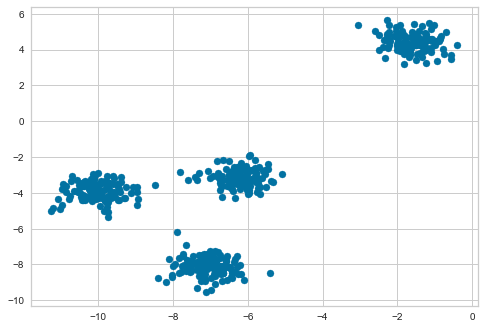

In [2]:
# dataset
X, y = make_blobs( n_samples=500, n_features=2,
                   centers=4,
                   cluster_std=0.5,
                   center_box=(-10.0, 10.0),
                   shuffle=True,
                   random_state=1 )
# plot dataset  
plt.scatter( X[:,0], X[:,1] )

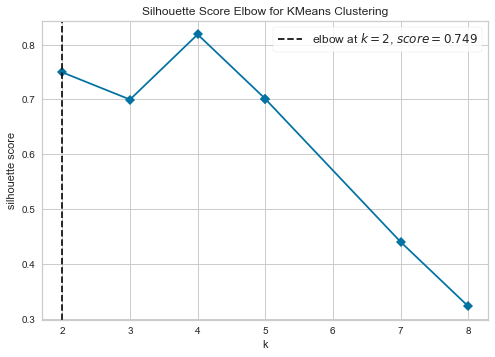

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [4]:
# modeling
clusters = [ 2, 3, 4, 5, 5, 7, 8]

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

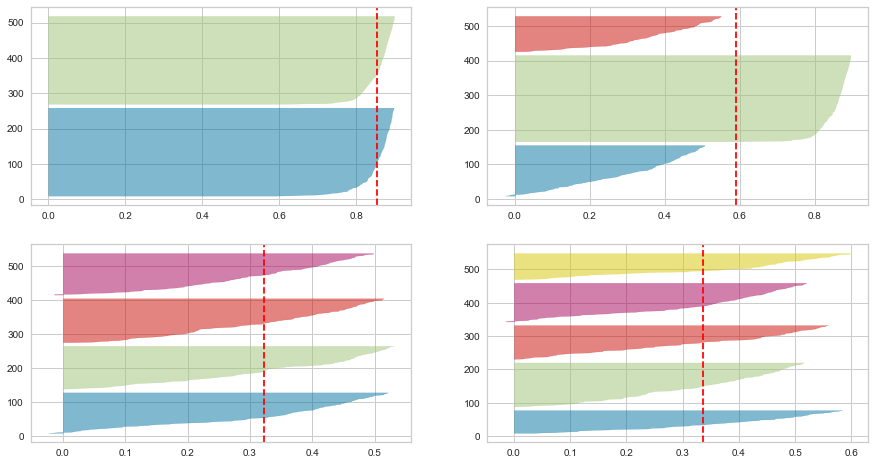

In [132]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in clusters:
    kmeans = c.KMeans( n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( i, 2 )
    
    visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( X )